In [31]:
from qiskit import  *
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.tools.visualization import plot_histogram

In [33]:
#Task 1
def quantum_circuit(x):
  backend = Aer.get_backend('qasm_simulator')
  q =QuantumRegister(1,'q')
  c = ClassicalRegister(1,'c')
  qc = QuantumCircuit(q,c)
  if x==0:
    circ1=qc.h(0)
    circ1 = qc.measure(q,c)
  elif x==1:
    circ2=qc.z(0)
    circ2 = qc.measure(q,c)
  job = execute(qc,backend,shots=1024)
  counts = job.result().get_counts()
  print(counts)
  return qc.draw() 

In [34]:
quantum_circuit(0)


{'0': 534, '1': 490}


┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [35]:
quantum_circuit(1)

{'0': 1024}


┌───┐┌─┐
q_0: ┤ Z ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [36]:
#Task2
import random 
def quantum_circuit(p,trials):
  backend = Aer.get_backend('qasm_simulator')
  q=QuantumRegister(1,'q')
  c=ClassicalRegister(1,'c')
  qc = QuantumCircuit(q,c)
  count1,count2=0,0
  prob ={}
  for i in range(trials):
    ntrials= random.random()
    if ntrials<p:
      circ2 =qc.h(0)
      circ2 = qc.measure(q,c)
      count1 += 1
      prob['Circ1'] = count1
    else:
      circ2 = qc.z(0)
      circ2 = qc.measure(q,c)
      count2 += 1
      prob['Circ2'] = count2
  print(ntrials)
  job = execute(qc,backend,shots=1024)
  counts = job.result().get_counts()
  print(counts)
  return prob

0.667104377970971
{'0': 501, '1': 523}


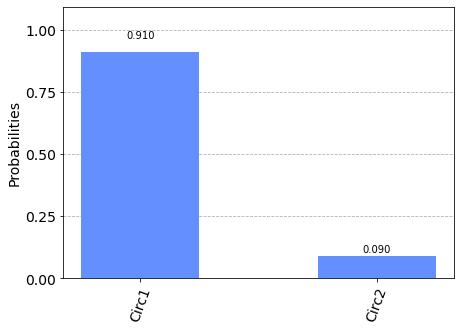

In [37]:
x = quantum_circuit(0.9,100)
plot_histogram(x)